##### Disclaimers 
This material is derived from **[scikit-learn-mooc](https://github.com/INRIA/scikit-learn-mooc)** under the fair-usage clause of `Creative Commons`.

*References to all the sources apart from the scikit-learn-mooc are linked*

### THIRD SESSION

#### Linear models 

Linear models can be used for both regression and classification problems.

Linear models are very interesting because they are simple models, easy to understand and usually very fast to train and thus acts as are great baseline for machine learning.

In the context of regression, i.e. for predicting a continuous variable, the method is called "linear regression". 

In the context of classification i.e. for predicting a discrete variable like a class, the canonical method is called logistic regression. 

The name of logistic regression is a bit misleading because it's really about classification.

![linear vs logistic](../figures/linear_regression_classification.png)


#### QUIZ 1

**1.What is a linear regression?**

a) a model that outputs a continuous prediction as the sum of the values of a limited subset of the input features

b) a model that outputs a binary prediction based on a linear combination of the values of the input features

c) a model that output a continuous prediction as a weighted sum of the input features

<br>

**2.Is it possible to get a perfect fit (zero prediction error on the training set) with a linear classifier on a non-linearly separable dataset?**

a) yes 

b) no


#### Beauty of Linear Regression and calculus

Why are Linear models so helpful?

Well, if you look intuitively at the example where we are given $X$, and we want to predict $y$, taking the average of the values in a small window around the value of say $x_{i}$ we want to predict will give us a pretty good estimate. If we plot these averages, we will get a plot that follows a line. 

![graph of average](../figures/graph_of_average.png)

*** 

We can define the simple linear regression (SLR) model as 

$y = a + bX$

( please note that one can use $x$ and $y$ here, but we wanted to keep this representation close to scikit-learn )


We are given a set of datapoint, say $D=\{(x_1,y_1) \dots, (x_n, y_n)\}$, they are contant and not variables. 

We will try to find the optimal parameter $a$ and $b$ by minimizing the mean squared loss.

$\operatorname{MSE}(y, \hat{y}) = \frac{1}{n} \sum_{i=1}^{i=n}(y_{i} - \hat{y}_{i})^{2}$

Given the SLR, with two parameters, we want to find the **best combination** of a and b such that minimize - 

$R(a,b) = \frac{1}{n} \sum_{i=1}^{i=n}(y_{i} - (a + bx_{i}))^{2}$

and we call this **combination** of *SLR* and *loss function* "**least-squares** linear regression". 

We can make a slight simplification by removing the constant term $n$

$R(a,b) = \sum_{i=1}^{i=n}(y_{i} - (a + bx_{i}))^{2}$

*** 

To find the pair $(a,b)$ that minimizes our objective function $R(a,b)$, we need to take **partial derivatives** with respect to both parameters  $(a,b)$, set them to 0 and solve both equations.

![derivative on a](../figures/a_param.png)

![derivative on b](../figures/b_param.png)

![least square linear regression](../figures/loss_slr.png)

*** 

So we see that the $a$ and $b$ for "**least-squares** linear regression"  depends

* Mean of $X$ and $y$ i.e $\overline{X}$ and $\overline{y}$

* Standard deviation (SD) of $X$ and $y$ i.e. $\sigma_{X}$ and  $\sigma_{y}$ 

* and r of $X$ and $y$ i.e $\rho(X,y)$


Let us look at the below example famously known as the Anscombe quadrant, where we have data with the same $\overline{X}$, $\overline{y}$,  $\sigma_{X}$,  $\sigma_{y}$  and $\rho(X,y)$ but they are entirely different.

![Oh Anscombe Quadrant](../figures/Anscombe_quadrant.png)

**Always plot your data, ALWAYS**

*** 

**Friendly Reminder ** 

*$X$ and $y$ have different names, but they all represent same core idea*
 

*“What’s in a name? That which we call a rose, By any other name would smell as sweet.”*



![what is in the name](../figures/x_y_diff_names.png)

<br>


[source](https://ds100.org/fa21/lecture/lec13/)

[source](https://youtu.be/7hVK78Ir618)


#### Linear regression without scikit-learn

Here we will introduce linear regression. Before presenting the available scikit-learn classes, we will provide some insights with a simple example. We will use a dataset that contains measurements taken on penguins.

In this problem, penguin mass is our target. It is a continuous variable that roughly varies between 2700 g and 6300 g. 

Thus, this is a regression problem (in contrast to classification). 

We also see that there is almost a linear relationship between the body mass of the penguin and its flipper length. The longer the flipper, the heavier the penguin.


In [1]:
import pandas as pd

penguins = pd.read_csv("../datasets/penguins_regression.csv")
penguins.head()

,Flipper Length (mm),Body Mass (g)
0,181.0,3750.0
1,186.0,3800.0
2,195.0,3250.0
3,193.0,3450.0
4,190.0,3650.0


Text(0.5, 1.0, 'Flipper length in function of the body mass')

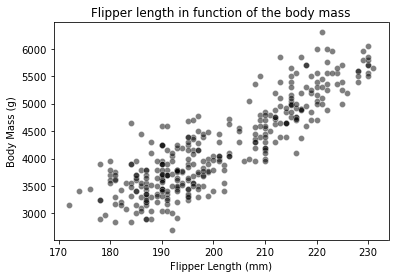

In [2]:
import seaborn as sns

feature_name = "Flipper Length (mm)"
target_name = "Body Mass (g)"
data, target = penguins[[feature_name]], penguins[target_name]

ax = sns.scatterplot(
    data=penguins,
    x=feature_name,
    y=target_name,
    color="black",
    alpha=0.5
)


ax.set_title("Flipper length in function of the body mass")

In [3]:
# we come up with a simple formula, where given a flipper length we could compute the body mass of a penguin
# using a linear relationship of the form y = a * x + b where a and b are the 2 parameters of our model.
def linear_model_flipper_mass(
    flipper_length,
    weight_flipper_length,
    intercept_body_mass
):
    """Linear model of the form y = a * x + b"""
    body_mass = weight_flipper_length * flipper_length + intercept_body_mass
    return body_mass

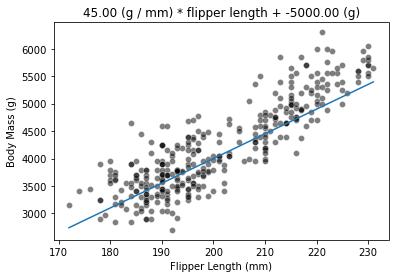

In [4]:
import numpy as np

weight_flipper_length = 45
intercept_body_mass = -5000
"""
The variable weight_flipper_length is a weight applied to the feature flipper_length in order to make the inference. 
When this coefficient is positive, it means that penguins with longer flipper lengths will have larger body masses. 
If the coefficient is negative, it means that penguins with shorter flipper lengths have larger body masses. 
Graphically, this coefficient is represented by the slope of the curve in the plot. 
"""
flipper_length_range = np.linspace(
    data.min(),
    data.max(),
    num=300
)

predicted_body_mass = linear_model_flipper_mass(
    flipper_length_range,
    weight_flipper_length,
    intercept_body_mass
)

label = "{0:.2f} (g / mm) * flipper length + {1:.2f} (g)"

ax = sns.scatterplot(
    data=penguins,
    x=feature_name,
    y=target_name,
    color="black",
    alpha=0.5
)

ax.plot(
    flipper_length_range,
    predicted_body_mass
)

_ = ax.set_title(label.format(weight_flipper_length, intercept_body_mass))

In [5]:
# we know that we can find the a and b i.e. intercept and slope from mean, SD and correlation

def standard_units(x):
    return (x - np.mean(x)) / np.std(x)

def correlation(x, y):
    return np.mean(standard_units(x) * standard_units(y))

def slope(x, y):
    return correlation(x, y) * (np.std(y) / np.std(x))

def intercept(x, y):
    return np.mean(y) - (slope(x, y) * np.mean(x))

slope is 49.68556640610011 and intercept is -5780.831358077066


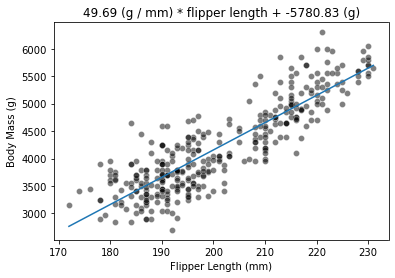

In [6]:
weight_flipper_length = slope(penguins[feature_name], penguins[target_name])
intercept_body_mass = intercept(penguins[feature_name], penguins[target_name])

print(f"slope is {weight_flipper_length} and intercept is {intercept_body_mass}")

flipper_length_range = np.linspace(
    data.min(),
    data.max(),
    num=300
)

predicted_body_mass = linear_model_flipper_mass(
    flipper_length_range,
    weight_flipper_length,
    intercept_body_mass
)

label = "{0:.2f} (g / mm) * flipper length + {1:.2f} (g)"

ax = sns.scatterplot(
    data=penguins,
    x=feature_name,
    y=target_name,
    color="black",
    alpha=0.5
)

ax.plot(
    flipper_length_range,
    predicted_body_mass
)

_ = ax.set_title(label.format(weight_flipper_length, intercept_body_mass))

#### Multiple linear regression and Linear Algebra 

Before we go to Multiple linear regression, let's quickly modify the representation of SLR to represent Multiple linear regression better.

rather than $\hat{y} = a + bX$ where $a$ and $b$ were our cofficients 

we will can use the representation $\hat{y} = \theta_{0} + \theta_{1}X = f_{\theta}(X)$

$\hat{\theta_{1}}$ = $r$ $\tfrac{\sigma_{y}}{\sigma_{X}}$ 

$\hat{\theta_{0}} = \overline{y} - \hat{\theta_{1}}\overline{X}$

So now, if we have two features ( and thus three-parameter ), we can extend our model as below. 

$\hat{y} = f_{\theta}(X) = \theta_{0} + \theta_{1}X_{1} + \theta_{2}X_{2}$

where $X_{1}$ and $X_{2}$ represent two features, i.e., in scikit-learn world, we will have two columns in input $X$

Similarly, we can extend the model for $p$ input features and one intercept term as below.

$\hat{y} = f_{\theta}(X) = \theta_{0} + \theta_{1}X_{1} + \theta_{2}X_{2} + \theta_{2}X_{2} + \cdots + \theta_{p}X_{p} = \theta_{0} + \sum_{j=1}^{j=p}\theta_{j} X_{j} $

where weights associated with feature $X_{j}$ is $\theta_{j}$

if we set $X_{0}$ to 1 for each observation, we can get a simplified or relatively cleaner version


$\hat{y} = f_{\theta}(X) = \sum_{j=0}^{j=p}\theta_{j} X_{j} $


We can use the above representation for any of the below cases.

Constant model : $f_{\theta}(X) = \theta$

Simple Linear regression model : $f_{\theta}(X) = \theta_{0} + \theta_{1}X$

Multiple Linear regression model : $f_{\theta}(X) = \theta_{0} + \theta_{1}X_{1} + \theta_{2}X_{2} + \theta_{2}X_{2} + \cdots + \theta_{p}X_{p}$

**RMSE**

$\operatorname{MSE}(y, \hat{y}) = \frac{1}{n}\sum_{i=1}^{i=n}(y - \hat{y})^{2}$

But as we know that $\operatorname{MSE}$ is in the not same scale as $y$, but we take the square root of $\operatorname{MSE}$ we get a quantity which has the same units as $y$

and that's what $\operatorname{RMSE}$ is 

$\operatorname{RMSE}(y, \hat{y}) = \sqrt[2]{\frac{1}{n}\sum_{i=1}^{i=n}(y - \hat{y})^{2}}$

But these metrics are still not easy to interpret, especially when comparing different models. One way to see how better this is from the constant model.

**Multiple $\operatorname{R}^{2}$**

We define the multiple $\operatorname{R}^{2}$ value as the square of the correlation between the true $y$ and predicted y, also known as the *coefficient of determination*.

$\operatorname{R}^{2} = \frac{variance \, of\, fitted\, values}{variance\, of\, y} = \frac{\sigma_{\hat{y}}}{\sigma_{y}}$ 

We can interpret multiple $\operatorname{R}^{2}$ as the *proportion of variance* in our true $y$ that our *fitted values*, i.e., prediction capture or **the proportion of variance that model explains**


[source](https://ds100.org/fa21/lecture/lec14/)

[source](https://youtu.be/oGIPhLtVb6k)



**Linear Algebra arrives**

Before we move forward, let us quickly look at the dot products of two vectors.

![dot products](../figures/vector_dot_product.png)

<br>

Next thing we should know is the norm of a vector which is "some measure" of the vector's length, like **l1 norm** or **l2 norm**

![norm of vectors](../figures/norm.png)

<br>

So what exactly is an L2 norm of a vector.

![l2 norm of vector](../figures/L2_norm.png)

<br>

Now looking at the MLR we already know from the perspective of  the vector dot product.

![MLR as dot product](../figures/MLR_as_dot_product.png)

<br>

As we know residuals is the difference between the actual and the predicted values - for all observations.

![residuals](../figures/residuals.png)

<br>

This matrix view has all the observation for all features and also the bias term - we call it *Design Matrix*

![design matrix](../figures/design_matrix.png)

<br>

And if we use the Design Matrix we can represent the MLR in a simple matrix based equation.

![MLR as matrix multiplication](../figures/MLR_as_matrix_multiplication.png)

<br>

![MLR for one feature](../figures/MLR_solving_one_feature.png)

<br>

![one vs multiple feature](../figures/single_vs_multiple.png)

<br>

and now if we look at the residuals with this new matrix perspective

![residuals of vectors](../figures/residual_vector.png)

<br>

[source](https://ds100.org/fa21/lecture/lec14/)

[source](https://youtu.be/oGIPhLtVb6k)


**Linear Algebra attacks**


we can replace $\hat{Y}$ with $X\hat{\theta}$ in equation of MSE

![MSE again](../figures/MSE_again.png)

<br>

as $1\div{n}$ is a constant we can remove it and thus ...

![finding theta](../figures/OP.png)

<br>

... converts our problem to a linear algebra problem.

As we know matrix is basically linear combination of vectors, so we can represent back our matrix in linear combination of vectors.

![linear combination of columns](../figures/LC_CLM.png)

<br>

Let us have a look at what *SPAN* means ... 

![span](../figures/SPAN.png)

<br>

![gemotric view](../figures/e.png)

<br>


![gemotric view and ortho](../figures/ortho_proj.png)


<br>

![orthogonality](../figures/ortho.png)

<br>

![orthogonality](../figures/m_v.png)

<br>


![residuals and MSE](../figures/Residual_to_MSE.png)

<br>


Finally :

$\hat{\theta} = (\mathbb{X}^T\mathbb{X})^{-1} \mathbb{X}^T\mathbb{Y}$

<br>


[source](https://ds100.org/fa21/lecture/lec14/)

[source](https://youtu.be/oGIPhLtVb6k)

In [7]:
# now we use the design matrix and linear algebra to calculate
# the weight and intercepts via thetas
def least_squares(X, y):
    return np.linalg.inv(X.T @ X) @ X.T @ y

 
penguins_bias  = penguins.copy(deep=True)
penguins_bias.loc[:, 'bias'] = 1

X = penguins_bias[['bias',feature_name]]
y = penguins_bias[[target_name]]


In [8]:
thetas = least_squares(X, y)

slope is 49.685566406100726 and intercept is -5780.831358077294


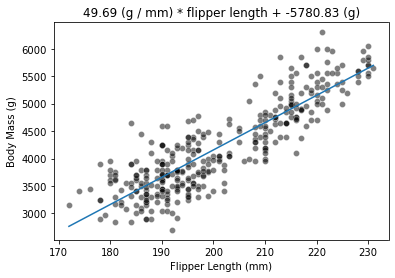

In [9]:
weight_flipper_length = thetas.values[1][0]
intercept_body_mass = thetas.values[0][0]

print(f"slope is {weight_flipper_length} and intercept is {intercept_body_mass}")

flipper_length_range = np.linspace(
    data.min(),
    data.max(),
    num=300
)

predicted_body_mass = linear_model_flipper_mass(
    flipper_length_range,
    weight_flipper_length,
    intercept_body_mass
)

label = "{0:.2f} (g / mm) * flipper length + {1:.2f} (g)"

ax = sns.scatterplot(
    data=penguins,
    x=feature_name,
    y=target_name,
    color="black",
    alpha=0.5
)

ax.plot(
    flipper_length_range,
    predicted_body_mass
)

_ = ax.set_title(label.format(weight_flipper_length, intercept_body_mass))

In [10]:
from sklearn import set_config

set_config(display="diagram")

In [11]:
import pandas as pd

penguins = pd.read_csv("../datasets/penguins_regression.csv")

feature_name = "Flipper Length (mm)"

target_name = "Body Mass (g)"

data, target = penguins[[feature_name]], penguins[target_name]

In [12]:
from sklearn.linear_model import LinearRegression

linear_regression = LinearRegression()

linear_regression.fit(
    data,
    target
)

# The instance linear_regression will store the parameter values in 
# the attributes coef_ and intercept_.

LinearRegression()

In [13]:
weight_flipper_length = linear_regression.coef_[0]
weight_flipper_length

49.68556640610011

In [14]:
linear_regression.coef_

array([49.68556641])

In [15]:
intercept_body_mass = linear_regression.intercept_
intercept_body_mass

-5780.831358077066

In [16]:
import numpy as np

flipper_length_range = np.linspace(
    data.min(),
    data.max(),
    num=300
)
predicted_body_mass = (
    weight_flipper_length * flipper_length_range + intercept_body_mass
)

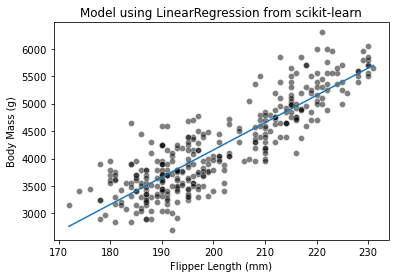

In [17]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.scatterplot(
    x=data[feature_name],
    y=target,
    color="black",
    alpha=0.5
)

plt.plot(
    flipper_length_range,
    predicted_body_mass
)

_ = plt.title("Model using LinearRegression from scikit-learn")

In [18]:
# The two metrics: (i) the mean squared error and (ii) the mean absolute error are implemented in scikit-learn to compute the goodness of fit of a model

from sklearn.metrics import mean_squared_error

inferred_body_mass = linear_regression.predict(
    data
)

model_error = mean_squared_error(
    target,
    inferred_body_mass
)

print(
    f"The mean squared error of the optimal model is {model_error:.2f}"
)

The mean squared error of the optimal model is 154546.19


In [19]:
# the mean squared error can be difficult to interpret. 
# The mean absolute error is more intuitive since it provides an error in the same unit as the one of the target.

from sklearn.metrics import mean_absolute_error

model_error = mean_absolute_error(
    target,
    inferred_body_mass
)

print(f"The mean absolute error of the optimal model is {model_error:.2f} g")

The mean absolute error of the optimal model is 313.00 g


#### QUIZ 2

**1.If we fit a linear regression where X is a single column vector, how many parameters our model will be made of?**

a) 1

b) 2 

c) 3

<br>

**2.If we train a scikit-learn LinearRegression with X being a single column vector and y a vector, coef_ and intercept_ will be respectively:**

a) an array of shape (1, 1) and a number 

b) an array of shape (1,) and an array of shape (1,) 

c) an array of shape (1, 1) and an array of shape (1,) 

d) an array of shape (1,) and a number 


#### Linear regression for a non-linear features-target relationship

we will learn that even if the parametrization of linear models is not natively adapted to the problem at hand, it is still possible to make linear models more expressive by engineering additional features.

A machine learning pipeline that combines a non-linear feature engineering step followed by a linear regression step can therefore be considered non-linear regression model as a whole.


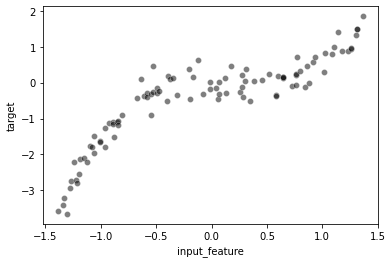

In [20]:
# we will generate and plot the dataset
import numpy as np
import pandas as pd
import seaborn as sns

rng = np.random.RandomState(42)

n_sample = 100

data_max, data_min = 1.4, -1.4

len_data = (data_max - data_min)

# sort the data to make plotting easier later
data = np.sort(rng.rand(n_sample) * len_data - len_data / 2)

noise = rng.randn(n_sample) * .3

target = data ** 3 - 0.5 * data ** 2 + noise

full_data = pd.DataFrame(
    {"input_feature": data,
    "target": target}
)

_ = sns.scatterplot(
    data=full_data,
    x="input_feature",
    y="target",
    color="black",
    alpha=0.5
)

In [21]:
# In scikit-learn, by convention data (also called X in the scikit-learn documentation) 
# should be a 2D matrix of shape (n_samples, n_features). 
# If data is a 1D vector, you need to reshape it into a matrix with a single column 
# if the vector represents a feature or a single row if the vector represents a sample.

print(
    f"original shape of the data is {data.shape}"
)
print(
    f"reshaped data would be {data.reshape((-1, 1)).shape}"
)


original shape of the data is (100,)
reshaped data would be (100, 1)


In [22]:
# X should be 2D for sklearn: (n_samples, n_features)
data = data.reshape((-1, 1))
data.shape

(100, 1)

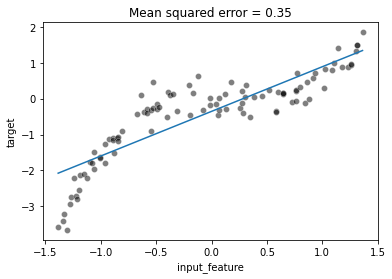

In [23]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

linear_regression = LinearRegression()

linear_regression.fit(
    data,
    target
)

target_predicted = linear_regression.predict(data)

mse = mean_squared_error(
    target,
    target_predicted
)

ax = sns.scatterplot(
    data=full_data,
    x="input_feature",
    y="target",
    color="black",
    alpha=0.5
)

ax.plot(data, target_predicted)
_ = ax.set_title(
    f"Mean squared error = {mse:.2f}"
)

In [24]:
print(
    f"weight: {linear_regression.coef_[0]:.2f}, "
    f"intercept: {linear_regression.intercept_:.2f}"
)

weight: 1.25, intercept: -0.35


**Note** 

It is important to note that the learnt model will not be able to handle the non-linear relationship between data and target since linear models assume the relationship between data and target to be linear.

Indeed, there are 3 possibilities to solve this issue:

* choose a model that can natively deal with non-linearity,

* engineer a richer set of features by including expert knowledge which can be directly used by a simple linear model, or

* use a "kernel" to have a locally-based decision function instead of a global linear decision function.

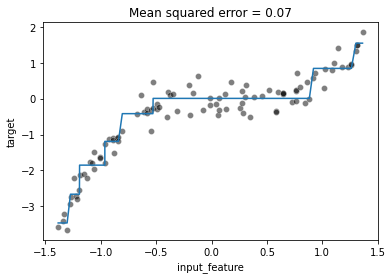

In [25]:
# By using a decision tree regressor which can natively handle non-linearity.

from sklearn.tree import DecisionTreeRegressor

tree = DecisionTreeRegressor(max_depth=3).fit(
    data,
    target
)
target_predicted = tree.predict(
    data
)
mse = mean_squared_error(
    target,
    target_predicted
)

ax.plot(
    data,
    target_predicted
)

ax = sns.scatterplot(
    data=full_data,
    x="input_feature",
    y="target",
    color="black",
    alpha=0.5
)

ax.plot(data, target_predicted)

_ = ax.set_title(f"Mean squared error = {mse:.2f}")


In [26]:
# Instead of having a model which can natively deal with non-linearity, 
# we will engineer new features, derived from the original features. 
# we could create two new features (data ** 2 and data ** 3) using this information as follows. 

# This kind of transformation is called a polynomial feature expansion:

print(
    f"original shape of data is {data.shape}"
)

# engineering new features 
data_expanded = np.concatenate(
    [data, data ** 2, data ** 3],
    axis=1
)

print(
    f"shape of exanded data is {data_expanded.shape}"
)


original shape of data is (100, 1)
shape of exanded data is (100, 3)


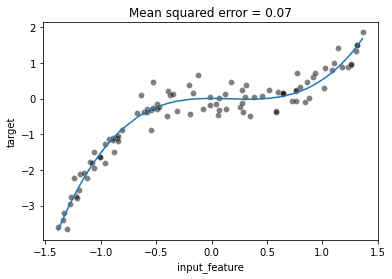

In [27]:
linear_regression.fit(
    data_expanded,
    target
)
target_predicted = linear_regression.predict(
    data_expanded
)
mse = mean_squared_error(
    target,
    target_predicted
)

ax = sns.scatterplot(
    data=full_data,
    x="input_feature",
    y="target",
    color="black",
    alpha=0.5
)

ax.plot(
    data,
    target_predicted
)
_ = ax.set_title(f"Mean squared error = {mse:.2f}")

# We can see that even with a linear model, 
# we can overcome the linearity limitation of the model by adding the non-linear 
# components in the design of additional features. 
# Here, we created new features by knowing the way the target was generated.

In [28]:
# Instead of manually creating such polynomial features one could directly use 
# sklearn.preprocessing.PolynomialFeatures

from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import PolynomialFeatures

polynomial_regression = make_pipeline(
    PolynomialFeatures(degree=3),
    LinearRegression(),
)

polynomial_regression.fit(
    data,
    target
)
polynomial_regression


Pipeline(steps=[('polynomialfeatures', PolynomialFeatures(degree=3)),
                ('linearregression', LinearRegression())])

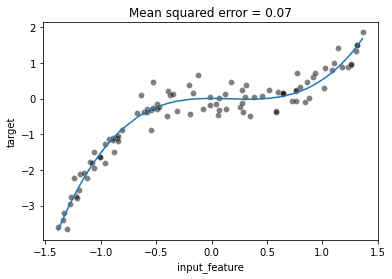

In [29]:
target_predicted = polynomial_regression.predict(
    data
)

mse = mean_squared_error(
    target,
    target_predicted
)

ax = sns.scatterplot(
    data=full_data,
    x="input_feature",
    y="target",
    color="black",
    alpha=0.5
)

ax.plot(data, target_predicted)
_ = ax.set_title(f"Mean squared error = {mse:.2f}")

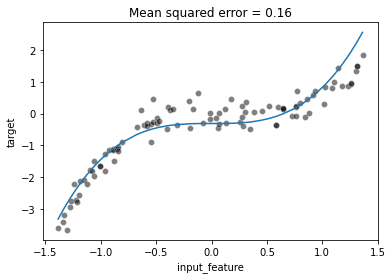

In [30]:
# and finally we make a linear model more expressive by using a "kernel"

# Instead of learning a weight per feature as we previously emphasized, 
# a weight will be assigned to each sample. 

# However, not all samples will be used. 
# This is the base of the support vector machine algorithm.

from sklearn.svm import SVR

svr = SVR(
    kernel="poly",
    degree=3
)

svr.fit(
    data,
    target
)

target_predicted = svr.predict(
    data
)

mse = mean_squared_error(
    target,
    target_predicted
)


ax = sns.scatterplot(
    data=full_data,
    x="input_feature",
    y="target",
    color="black",
    alpha=0.5
)

ax.plot(
    data,
    target_predicted
)

_ = ax.set_title(f"Mean squared error = {mse:.2f}")

**Note**

Though Kernel methods such as SVR are very efficient for small to medium datasets. 
For larger datasets with n_samples >> 10_000, it is often computationally more efficient to perform explicit feature expansion 

Using PolynomialFeatures or other non-linear transformers from scikit-learn such as [KBinsDiscretizer](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.KBinsDiscretizer.html) or [Nystroem](https://scikit-learn.org/stable/modules/generated/sklearn.kernel_approximation.Nystroem.html).




In [31]:
# https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.KBinsDiscretizer.html
from sklearn.preprocessing import KBinsDiscretizer

binned_regression = make_pipeline(
    KBinsDiscretizer(n_bins=8),
    LinearRegression(),
)

binned_regression.fit(data, target)
binned_regression

Pipeline(steps=[('kbinsdiscretizer', KBinsDiscretizer(n_bins=8)),
                ('linearregression', LinearRegression())])

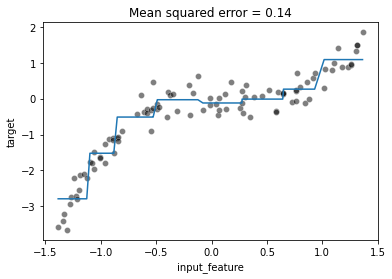

In [32]:
target_predicted = binned_regression.predict(
    data
)

mse = mean_squared_error(
    target,
    target_predicted
)

ax = sns.scatterplot(
    data=full_data,
    x="input_feature",
    y="target",
    color="black",
    alpha=0.5
)

ax.plot(
    data,
    target_predicted
)

_ = ax.set_title(f"Mean squared error = {mse:.2f}")

In [33]:
# https://scikit-learn.org/stable/modules/generated/sklearn.kernel_approximation.Nystroem.html

from sklearn.kernel_approximation import Nystroem

nystroem_regression = make_pipeline(
    Nystroem(n_components=5),
    LinearRegression(),
)

nystroem_regression.fit(data, target)
nystroem_regression

Pipeline(steps=[('nystroem', Nystroem(n_components=5)),
                ('linearregression', LinearRegression())])

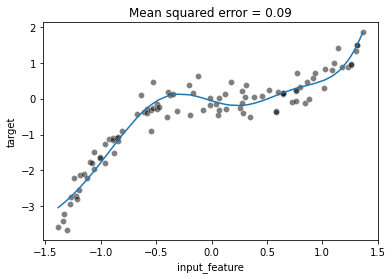

In [34]:
target_predicted = nystroem_regression.predict(data)

mse = mean_squared_error(
    target,
    target_predicted
)

ax = sns.scatterplot(
    data=full_data,
    x="input_feature",
    y="target",
    color="black",
    alpha=0.5
)

ax.plot(data, target_predicted)

_ = ax.set_title(f"Mean squared error = {mse:.2f}")

#### QUIZ 3

**1.Let us consider a pipeline that combines a polynomial feature extraction of degree 2 and a linear regression model. Let us assume that the linear regression coefficients are all non-zero and that the dataset contains a single feature. Is the prediction function of this pipeline a straight line?**

a) yes 

b) no

<br>


**2.Fitting a linear regression where X has n_features columns and the target is a single continuous vector, what is the respective type/shape of coef_ and intercept_?**


a) it is not possible to fit a linear regression in dimension higher than 2 

b) array of shape (n_features,) and a float

c) array of shape (1, n_features) and an array of shape (1,)




#### Regularization of linear regression model


We will go a bit deeper and look at avoiding overfitting with linear models.

**Linear model overfits?**

<br>

A linear model is simple, but it can overfit for scenarios where we have many features. 
For instance, in genomics, the number of features is much larger than the number of training points. In this regime, you will often observe that the linear model can overfit significantly and sometimes catastrophically. 

It's very often the case that we have no good understanding of which feature is valuable or not. And you might want to include all of the features to be sure to predict anything. But if you do this, then you might run into overfitting. It's especially the case if you include features that are not necessarily informative to predict the target variable.

![useless features](../figures/regularization_irrelavant_features.png)

<br>

So Linear model can overfit when

1. n_samples << n_features 
2. We have many uninformative features

**What is the solution?**

So how do we deal with this situation where we don't know which features are interesting ahead of time? 

Either we can try an automated feature selection strategy, which will try to do some statistical analysis of the features to weed out the ones that are not likely to be very predictive and reduce overfitting by reducing the number of features. 

sklearn provides this via [feature selection](https://scikit-learn.org/stable/modules/feature_selection.html)

<br>

Or we can use the power of *regularization*. 

What is **Regularization** and how can it reduce the overfitting? 


Let us look at an example of using a simple Ridge Regression for Regularization. We start with a Simple non-regularized Linear Regression.

We try to predict Y given X. X is the input variable, and Y is the target variable. 

We consider a minimal training set. 

We have five training points in blue available from all possible gray points, and we start with linear regression without any regularization. 

As we see, the specific training set that we picked up is not very representative of the general shape of the generative process. 


![simple linear regression](../figures/REG_FM/REG_fm_8.png)


We see the straight line here is very sensitive to the specific choice of the blue data points. And we can see from the general shape of the gray data points that if we had picked up data points more in the general trend, we would have found a different slope. 


The coefficient of the linear model would have been different. We can run this experiment by, instead of picking those 5 data points, picking an alternative 5 data points, another training set, and repeating this.

![multiple models for different choices of data](../figures/REG_FM/REG_fm_7.png)


We say that we have a high variance problem because the slope here is very sensitive to the specific choice of the training set. And there is no bias because the model is free to find the best fit for a given training set. 

If we want to avoid this high variance problem, we can introduce Regularization, for instance, using Ridge regression. If you do this with a specific alpha value, you will see that the line will be constrained to a lower slope. The slope coefficient will be lower. It cannot go up as dramatically as before. 

So if instead of using unregularized linear regression, we use ridge regression on the same problem, then we can hope to reduce this variability. 

![ridge arrives](../figures/REG_FM/REG_fm_6.png)

This constraint on variability is controlled by the parameter $\alpha$.

![sklearn and alpha parameter](../figures/REG_FM/REG_fm_3.png)


We found a good trade-off. If we increase alpha progressively, we see that all the slopes for the different training sets start the group to be much more similar and better. But if we increase alpha too much, then we introduce too much bias, and basically, all the slopes are very close to zero. 

![control your alpha](../figures/REG_FM/REG_fm_5.png)


So we should pick the appropriate value for the alphas. We can do that either through `GridSearchCV` or use `RidgeCV` 

![Ridge is better than Grid](../figures/REG_FM/REG_fm_4.png)

**Regularization is like salt, don't overuse it, or you will ruin the dish** 

We can also have Regularization in classification. By default, the `LogisticRegression` has the parameter to control the Regularization. And if you want to control Regularization, you can control the C parameter by default, C=1. 

So C is a bit related to alpha. Still, it's a bit of the opposite of alpha, meaning that if C is a significant value like C=1000, for instance, then you will get a weaker regularization than the default value of C=1. 

If you want to increase the Regularization, you have to decrease the value of C. For instance, 0.01 will be a strongly regularized logistic regression model. 

And the effects of Regularization on logistic regression are two-fold. 


![regularization in logistic regression](../figures/REG_FM/REG_fm_2.png)


*first effect* 

For a **small C value** (i.e., a strong regularization), we notice that the region of the feature space where the model will not be too confident is much more significant or more prominent. When we say not too confident, we mean that the model will have predicted class membership probabilities close to 0.5. For the two groups of points in the middle, in the case of a small C value, the probability is that the model will not be very confident between those two lines. 

Whereas here, for a **large C value**, a smaller regularization, you see that the regions where the model is not too confident are much smaller. It's just the section of the space between the groups. And in particular, for the points for which the model was not confident with a strong regularization, it is now very confident.


*second effect*  

We notice that even the position and the orientation of the separation between the two groups can change. As you can see, the lines are tilted in the opposite direction in the two plots.

With **Large C**, i.e., small Regularization, the data points of the training set that influence the orientation of the separating lines are those points close to the decision boundary. 

With  **Small C**, i.e., large Regularization,  many more points impact the orientation of the straight line. 

There is also an effect on how many points contribute to the position of a straight line. And it makes sense. When we have a small regularization, minor variations of a few data points close to the decision boundary can significantly affect the orientation. Whereas when we have a strong regularization, we have to consider many more data points at the center to make it move. 

<br>

**Summary**

![a simple summary](../figures/REG_FM/REG_fm_1.png)



**Short formal introduction to Ridge and Lasso**

![1](../figures/REG_LR/REG_RL_0.png)

![1](../figures/REG_LR/REG_RL_1.png)

![1](../figures/REG_LR/REG_RL_2.png)

![1](../figures/REG_LR/REG_RL_3.png)

![1](../figures/REG_LR/REG_RL_4.png)

![1](../figures/REG_LR/REG_RL_5.png)


[source](https://youtu.be/B-labBbXj_c)


[source](https://ds100.org/fa21/lecture/lec18/)

In [35]:
"""
Now we will see the limitations of linear regression models and the advantage of using
regularized models instead. 

Besides, we will also present the preprocessing required when dealing with regularized models.

We will highlight the over-fitting issue that can arise with a simple linear regression model.

"""

from sklearn.datasets import fetch_california_housing

data, target = fetch_california_housing(
    as_frame=True,
    return_X_y=True
)
target *= 100  # rescale the target in k$
data.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25


In [36]:
from sklearn.model_selection import cross_validate
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

linear_regression = make_pipeline(
    PolynomialFeatures(degree=2),
    LinearRegression()
)

cv_results = cross_validate(
    linear_regression,
    data, target,
    cv=10,
    scoring="neg_mean_squared_error",
    return_train_score=True,
    return_estimator=True
)
linear_regression

Pipeline(steps=[('polynomialfeatures', PolynomialFeatures()),
                ('linearregression', LinearRegression())])

In [37]:
train_error = -cv_results["train_score"]

print(
    f"Mean squared error of linear regression model on the train set:\n"
    f"{train_error.mean():.3f} +/- {train_error.std():.3f}"
)

test_error = -cv_results["test_score"]

print(
    f"Mean squared error of linear regression model on the test set:\n"
    f"{test_error.mean():.3f} +/- {test_error.std():.3f}"
)

Mean squared error of linear regression model on the train set:
4190.212 +/- 151.123
Mean squared error of linear regression model on the test set:
13334.943 +/- 20292.680


**Note**

The score on the training set is much better. 

This generalization performance gap between the training and testing score is an indication that our model overfitted our training set.

Indeed, this is one of the danger when augmenting the number of features with a `PolynomialFeatures` transformer. 

Our model will focus on some specific features. 

We can check the weights of the model to have a confirmation. 

We will create a dataframe where the columns will contain the name of the feature while the line the coefficients values stored by each model during the cross-validation.

Since we used a PolynomialFeatures to augment the data, we will create feature names representative of the feature combination.

Scikit-learn provides a `get_feature_names_out` method for this purpose. 


First, let's get the first fitted model from the `cross-validation`.

In [38]:
model_first_fold = cv_results["estimator"][0]
model_first_fold

Pipeline(steps=[('polynomialfeatures', PolynomialFeatures()),
                ('linearregression', LinearRegression())])

In [39]:
feature_names = model_first_fold[0].get_feature_names_out(
    input_features=data.columns
)

print(
    f"number of total columns is {len(data.columns)}\n"
    f"number of features used is {len(feature_names)}"
)

feature_names

number of total columns is 8
number of features used is 45


array(['1', 'MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population',
       'AveOccup', 'Latitude', 'Longitude', 'MedInc^2', 'MedInc HouseAge',
       'MedInc AveRooms', 'MedInc AveBedrms', 'MedInc Population',
       'MedInc AveOccup', 'MedInc Latitude', 'MedInc Longitude',
       'HouseAge^2', 'HouseAge AveRooms', 'HouseAge AveBedrms',
       'HouseAge Population', 'HouseAge AveOccup', 'HouseAge Latitude',
       'HouseAge Longitude', 'AveRooms^2', 'AveRooms AveBedrms',
       'AveRooms Population', 'AveRooms AveOccup', 'AveRooms Latitude',
       'AveRooms Longitude', 'AveBedrms^2', 'AveBedrms Population',
       'AveBedrms AveOccup', 'AveBedrms Latitude', 'AveBedrms Longitude',
       'Population^2', 'Population AveOccup', 'Population Latitude',
       'Population Longitude', 'AveOccup^2', 'AveOccup Latitude',
       'AveOccup Longitude', 'Latitude^2', 'Latitude Longitude',
       'Longitude^2'], dtype=object)

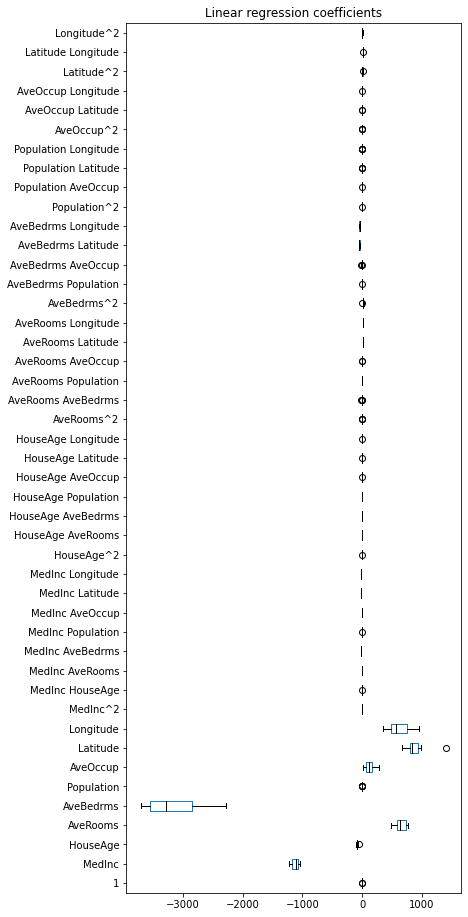

In [40]:
import pandas as pd
import matplotlib.pyplot as plt

coefs = [est[-1].coef_ for est in cv_results["estimator"]]

weights_linear_regression = pd.DataFrame(
    coefs,
    columns=feature_names
)

color = {
    "whiskers": "black",
    "medians": "black",
    "caps": "black"
}

weights_linear_regression.plot.box(
    color=color,
    vert=False,
    figsize=(6, 16)
)

_ = plt.title("Linear regression coefficients")

In [41]:
# we see some features are have more impact and some have less contribution
# We can force the linear regression model to consider all features in a more homogeneous manner. 
# In fact, we could force large positive or negative weight to shrink toward zero. 
# 
# This is known as regularization. 
# 
# We will use a ridge model which enforces such behavior.

from sklearn.linear_model import Ridge

ridge = make_pipeline(
    PolynomialFeatures(degree=2),
    Ridge(alpha=100)
)

"""
We will generate a couple of warnings because the features included both extremely large and extremely small values, 
which are causing numerical problems when training the predictive model.
"""
cv_results = cross_validate(
    ridge,
    data,
    target,
    cv=10,
    scoring="neg_mean_squared_error",
    return_train_score=True,
    return_estimator=True
)

/Users/vaibhav/miniconda3/envs/ml_with_sk/lib/python3.10/site-packages/sklearn/linear_model/_ridge.py:212: LinAlgWarning: Ill-conditioned matrix (rcond=2.672e-17): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True, overwrite_a=True).T
/Users/vaibhav/miniconda3/envs/ml_with_sk/lib/python3.10/site-packages/sklearn/linear_model/_ridge.py:212: LinAlgWarning: Ill-conditioned matrix (rcond=2.67257e-17): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True, overwrite_a=True).T
/Users/vaibhav/miniconda3/envs/ml_with_sk/lib/python3.10/site-packages/sklearn/linear_model/_ridge.py:212: LinAlgWarning: Ill-conditioned matrix (rcond=2.75536e-17): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True, overwrite_a=True).T
/Users/vaibhav/miniconda3/envs/ml_with_sk/lib/python3.10/site-packages/sklearn/linear_model/_ridge.py:212: LinAlgWarning: Ill-conditioned matrix (rcond=2.67367e-17): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=

In [42]:
train_error = -cv_results["train_score"]

print(
    f"Mean squared error of linear regression model on the train set:\n"
    f"{train_error.mean():.3f} +/- {train_error.std():.3f}"
)

test_error = -cv_results["test_score"]
print(
    f"Mean squared error of linear regression model on the test set:\n"
    f"{test_error.mean():.3f} +/- {test_error.std():.3f}"
)

# We see that the training and testing scores are much closer, indicating that our model is less overfitting.
# We can compare the values of the weights of ridge with the un-regularized linear regression

Mean squared error of linear regression model on the train set:
4373.180 +/- 153.942
Mean squared error of linear regression model on the test set:
7303.589 +/- 4950.732


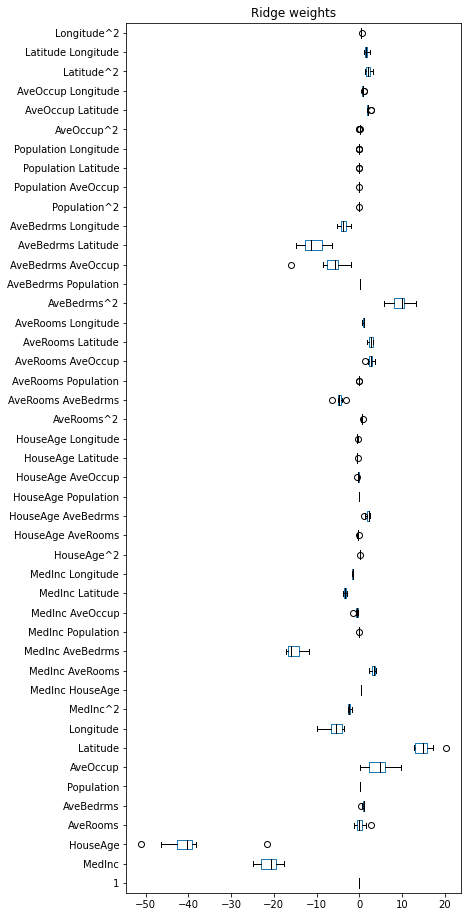

In [43]:
coefs = [est[-1].coef_ for est in cv_results["estimator"]]

weights_ridge = pd.DataFrame(
    coefs,
    columns=feature_names
)

weights_ridge.plot.box(
    color=color,
    vert=False,
    figsize=(6, 16)
)


_ = plt.title("Ridge weights")


**Note**

By comparing the magnitude of the weights on this plot compared to the previous plot, 
we see that a ridge model will enforce all weights to have a similar magnitude, 
while the overall magnitude of the weights is shrunk towards zero with respect to the linear regression model.

However, in above example, we omitted two important aspects: 

1. the need to scale the data and 

2. the need to search for the best regularization parameter.



##### Feature scaling and regularization
On the one hand, weights define the link between feature values and the predicted target.
On the other hand, regularization adds constraints on the weights of the model through the `alpha` parameter. Therefore, the effect that feature rescaling has on the final weights also interacts with regularization.

Let's consider the case where features live on the same scale/units: if two features are found to be equally important by the model, they will be affected similarly by regularization strength.

Now, let's consider the scenario where features have completely different data scale (for instance age in years and annual revenue in dollars).

If two features are as important, our model will boost the weights of features with small scale and reduce the weights of features with high scale.

We recall that regularization forces weights to be closer. Therefore, we get an intuition that if we want to use regularization, dealing with rescaled data would make it easier to find an optimal regularization parameter and
thus an adequate model.

As a side note, some solvers based on gradient computation are expecting such rescaled data. Unscaled data will be detrimental when computing the optimal weights. 

**Therefore, when working with a linear model and numerical data, it is generally good practice to scale the data.**

Thus, we will add a `StandardScaler` in the machine learning pipeline. This scaler will be placed just before the regressor.

In [44]:
from sklearn.preprocessing import StandardScaler

ridge = make_pipeline(
    PolynomialFeatures(degree=2),
    StandardScaler(),
    Ridge(alpha=0.5)
)

cv_results = cross_validate(
    ridge,
    data,
    target,
    cv=10,
    scoring="neg_mean_squared_error",
    return_train_score=True,
    return_estimator=True
)
ridge

Pipeline(steps=[('polynomialfeatures', PolynomialFeatures()),
                ('standardscaler', StandardScaler()),
                ('ridge', Ridge(alpha=0.5))])

In [45]:
train_error = -cv_results["train_score"]
print(
      f"Mean squared error of linear regression model on the train set:\n"
      f"{train_error.mean():.3f} +/- {train_error.std():.3f}"
)

test_error = -cv_results["test_score"]
print(
      f"Mean squared error of linear regression model on the test set:\n"
      f"{test_error.mean():.3f} +/- {test_error.std():.3f}"
)

Mean squared error of linear regression model on the train set:
4347.036 +/- 156.666
Mean squared error of linear regression model on the test set:
5508.472 +/- 1816.642


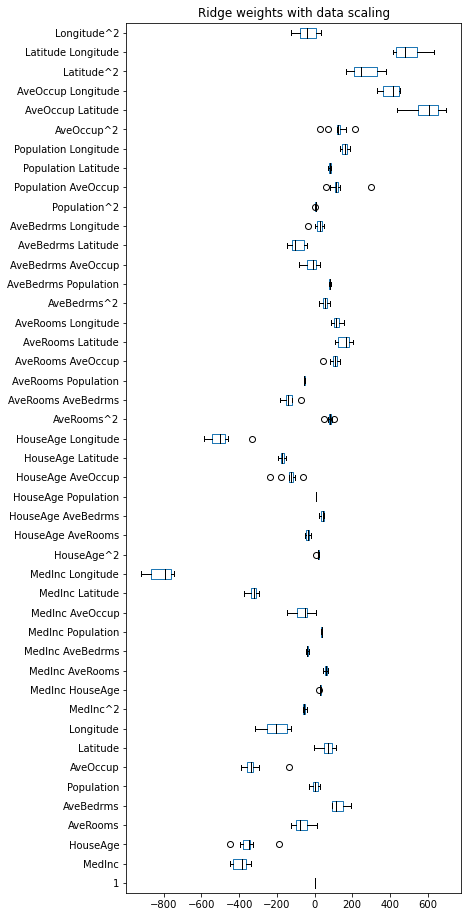

In [46]:
coefs = [est[-1].coef_ for est in cv_results["estimator"]]

weights_ridge = pd.DataFrame(
    coefs,
    columns=feature_names
)

weights_ridge.plot.box(
    color=color,
    vert=False,
    figsize=(6, 16)
)

_ = plt.title("Ridge weights with data scaling")

In [47]:
# we see that now all weight magnitudes are closer and that all features are more equally contributing.

# We will now check the impact of the value of alpha by increasing its value.

ridge = make_pipeline(
    PolynomialFeatures(degree=2),
    StandardScaler(),
    Ridge(alpha=1_000_000)
)

cv_results = cross_validate(
    ridge,
    data,
    target,
    cv=10,
    scoring="neg_mean_squared_error",
    return_train_score=True,
    return_estimator=True
)

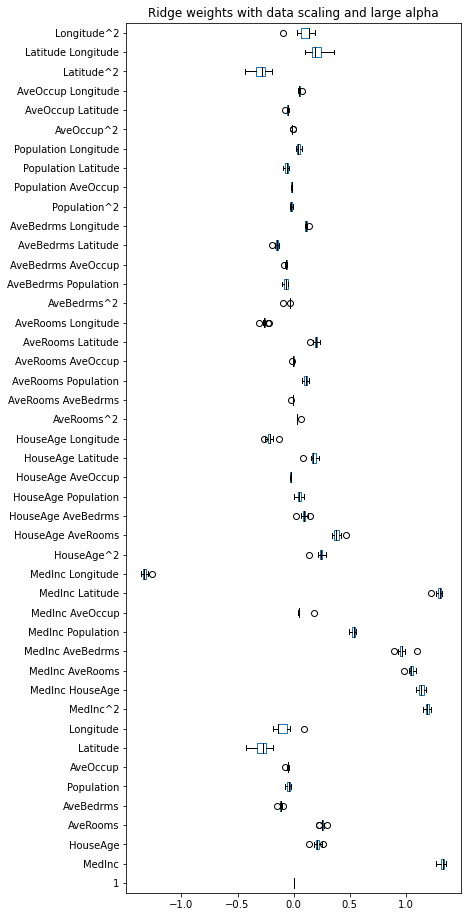

In [48]:
coefs = [est[-1].coef_ for est in cv_results["estimator"]]

weights_ridge = pd.DataFrame(
    coefs,
    columns=feature_names
)

weights_ridge.plot.box(
    color=color,
    vert=False,
    figsize=(6, 16)
)

"""
Looking specifically to weights values, we observe that increasing the value of alpha will decrease the weight values. 
A negative value of alpha would actually enhance large weights and promote overfitting.
"""
_ = plt.title("Ridge weights with data scaling and large alpha")


##### Fine tuning the regularization parameter

As mentioned, the regularization parameter needs to be tuned on each dataset.
The default parameter will not lead to the optimal model. Therefore, we need to tune the `alpha` parameter.

Model hyperparameter tuning should be done with care. Indeed, we want to find an optimal parameter that maximizes some metrics. Thus, it requires both a training set and testing set.

However, this testing set should be different from the out-of-sample testing set that we used to evaluate our model: if we use the same one, we are using an `alpha` which was optimized for this testing set and it breaks the
out-of-sample rule.

Therefore, we should include search of the hyperparameter `alpha` within the cross-validation. 

As we saw in previous sessions, we could use a grid-search. However, some predictor in scikit-learn are available with an integrated hyperparameter search, more efficient than using a grid-search.
The name of these predictors finishes by `CV`. In the case of `Ridge`, scikit-learn provides a `RidgeCV` regressor.

Therefore, we can use this predictor as the last step of the pipeline. Including the pipeline a cross-validation allows to make a nested cross-validation: the inner cross-validation will search for the best alpha, while the outer cross-validation will give an estimate of the testing score.

In [49]:
import numpy as np
from sklearn.linear_model import RidgeCV

alphas = np.logspace(-2, 0, num=20)

ridge = make_pipeline(
    PolynomialFeatures(degree=2),
    StandardScaler(),
    RidgeCV(alphas=alphas, store_cv_values=True)
)
ridge

Pipeline(steps=[('polynomialfeatures', PolynomialFeatures()),
                ('standardscaler', StandardScaler()),
                ('ridgecv',
                 RidgeCV(alphas=array([0.01      , 0.01274275, 0.01623777, 0.02069138, 0.02636651,
       0.03359818, 0.04281332, 0.05455595, 0.06951928, 0.08858668,
       0.11288379, 0.14384499, 0.18329807, 0.23357215, 0.29763514,
       0.37926902, 0.48329302, 0.61584821, 0.78475997, 1.        ]),
                         store_cv_values=True))])

In [50]:
from sklearn.model_selection import ShuffleSplit

cv = ShuffleSplit(
    n_splits=5,
    random_state=1
)

cv_results = cross_validate(
    ridge,
    data,
    target,
    cv=cv,
    scoring="neg_mean_squared_error",
    return_train_score=True,
    return_estimator=True,
    n_jobs=2
)

train_error = -cv_results["train_score"]

print(
    f"Mean squared error of linear regression model on the train set:\n"
    f"{train_error.mean():.3f} +/- {train_error.std():.3f}"
)

test_error = -cv_results["test_score"]

print(
    f"Mean squared error of linear regression model on the test set:\n"
    f"{test_error.mean():.3f} +/- {test_error.std():.3f}"
)

Mean squared error of linear regression model on the train set:
4306.562 +/- 25.918
Mean squared error of linear regression model on the test set:
4348.657 +/- 252.921


In [51]:
from pprint import pprint
pprint(cv_results["estimator"])

[Pipeline(steps=[('polynomialfeatures', PolynomialFeatures()),
                ('standardscaler', StandardScaler()),
                ('ridgecv',
                 RidgeCV(alphas=array([0.01      , 0.01274275, 0.01623777, 0.02069138, 0.02636651,
       0.03359818, 0.04281332, 0.05455595, 0.06951928, 0.08858668,
       0.11288379, 0.14384499, 0.18329807, 0.23357215, 0.29763514,
       0.37926902, 0.48329302, 0.61584821, 0.78475997, 1.        ]),
                         store_cv_values=True))]),
 Pipeline(steps=[('polynomialfeatures', PolynomialFeatures()),
                ('standardscaler', StandardScaler()),
                ('ridgecv',
                 RidgeCV(alphas=array([0.01      , 0.01274275, 0.01623777, 0.02069138, 0.02636651,
       0.03359818, 0.04281332, 0.05455595, 0.06951928, 0.08858668,
       0.11288379, 0.14384499, 0.18329807, 0.23357215, 0.29763514,
       0.37926902, 0.48329302, 0.61584821, 0.78475997, 1.        ]),
                         store_cv_values=True))]),
 Pip

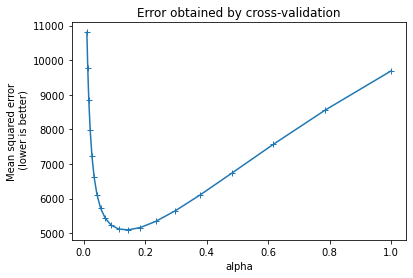

In [52]:
# When fitting the ridge regressor, we also requested to store the error found during cross-validation (by setting the parameter store_cv_values=True). 
# We will plot the mean squared error for the different alphas regularization strength that we tried.


mse_alphas = [
    est[-1].cv_values_.mean(axis=0)
    for est in cv_results["estimator"]
]
cv_alphas = pd.DataFrame(
    mse_alphas, columns=alphas
)

cv_alphas.mean(axis=0).plot(marker="+")

plt.ylabel("Mean squared error\n (lower is better)")

plt.xlabel("alpha")

#
# regularization is just like salt in cooking: 
# one must balance its amount to get the best generalization performance.
# 
_ = plt.title("Error obtained by cross-validation")


In [53]:
best_alphas = [est[-1].alpha_ for est in cv_results["estimator"]]
best_alphas

[0.08858667904100823,
 0.11288378916846889,
 0.37926901907322497,
 0.14384498882876628,
 0.11288378916846889]

**Note**

The optimal regularization strength is not necessarily the same on all cross-validation iterations. 

But since we expect each cross-validation resampling to stem from the same data distribution, 
it is common practice to use the average value of the best `alpha` found on different
cross-validation folds as our final estimate for the tuned `alpha`.



In [54]:
print(
    f"The mean optimal alpha leading to the best generalization performance is:\n"
    f"{np.mean(best_alphas):.2f} +/- {np.std(best_alphas):.2f}"
)

The mean optimal alpha leading to the best generalization performance is:
0.17 +/- 0.11


##### Deeper look at Regularization

<br>

We want to reduce the tendency of the model to overfit.

![](../figures/REG_ME/REG_MATH_LR_1.png)

<br>

We can say that we want to reduce the complexity i.e. constrain the complexity of the model

![](../figures/REG_ME/REG_MATH_LR_2.png)

<br>

This $\beta$ is our regularizartion parameter.

![](../figures/REG_ME/REG_MATH_LR_3.png)

<br>

Complexity can be defined as the number and kind of features used.

![](../figures/REG_ME/REG_MATH_LR_4.png)

<br>

We can't do the search for combination of parameters so we need some sort of aproximation 

![](../figures/REG_ME/REG_MATH_LR_5.png)

<br>

We pick a simple example of two $\theta$ 

In $L_{0}$ norm we restrict overself to pick one of the two $\theta$ 

![](../figures/REG_ME/REG_MATH_LR_6.png)

<br>

In $L_{1}$ norm we restrict the $\theta$  to have value within this square.

![](../figures/REG_ME/REG_MATH_LR_7.png)

<br>

We can increase the size of this square.

![](../figures/REG_ME/REG_MATH_LR_8.png)

<br>

or reduce the size of this square.

![](../figures/REG_ME/REG_MATH_LR_9.png)

<br>

$L_{1}$ is LASSO - Least Absolute Shrinkage and Selection Operator 

![](../figures/REG_ME/REG_MATH_LR_10.png)

<br>

We can use $L_{2}$ which considers the square of the parameters.

![](../figures/REG_ME/REG_MATH_LR_12.png)

<br>

We can reduce .. 

![](../figures/REG_ME/REG_MATH_LR_13.png)

<br>

or increase the size of this ball, that is control the $\beta$ 

![](../figures/REG_ME/REG_MATH_LR_14.png)


<br>


[source](https://youtu.be/NqKtsZpHmRY)

[source](https://ds100.org/fa21/lecture/lec18/)


**Summary**

![](../figures/REG_ME/REG_MATH_LR_15.png)

<br>

![](../figures/REG_ME/REG_MATH_LR_16.png)


<br>


[source](https://youtu.be/NqKtsZpHmRY)

[source](https://ds100.org/fa21/lecture/lec18/)

#### QUIZ 4

**1.Which of the following estimators can solve linear regression problems?**

a) sklearn.linear_model.LinearRegression

b) sklearn.linear_model.LogisticRegression

c) sklearn.linear_model.Ridge

<br>

**2.Regularization allows:**


a) to create a model robust to outliers (samples that differ widely from other observations)

b) to reduce overfitting by forcing the weights to stay close to zero

c) to reduce underfitting by making the problem linearly separable

<br>

**3.A ridge model is:**

a) the same as linear regression with penalized weights

b) the same as logistic regression with penalized weights

c) a linear model

d) a non linear model

<br>

**4.Assume that a data scientist has prepared a train/test split and plans to use the test for the final evaluation of a Ridge model. The parameter alpha of the Ridge model:**

a) is internally tuned when calling fit on the train set

b) should be tuned by running cross-validation on a train set

c) should be tuned by running cross-validation on a test set 

d) must be a positive number

<br>

**5.Scaling the data before fitting a model:**

a) is often useful for regularized linear models

b) is always necessary for regularized linear models

c) may speed-up fitting

d) has no impact on the optimal choice of the value of a regularization parameter

<br>

**6.The effect of increasing the regularization strength in a ridge model is to:**

a) shrink all weights towards zero

b) make all weights equal

c) set a subset of the weights to exactly zero

d) constrain all the weights to be positive

#### Linear model for classification
In regression the target to be predicted was a continuous variable. 

In classification, this target will be discrete (e.g. categorical).


The linear regression that we previously saw will predict a continuous output. When the target is a binary outcome, one can use the logistic function to model the probability. This model is known as logistic regression.

Scikit-learn provides the class `LogisticRegression` which implements this algorithm.

We will go back to our penguin dataset. However, this time we will try to predict the penguin species using the culmen information. 

We will also simplify our classification problem by selecting only 2 of the penguin species to solve a binary classification problem.



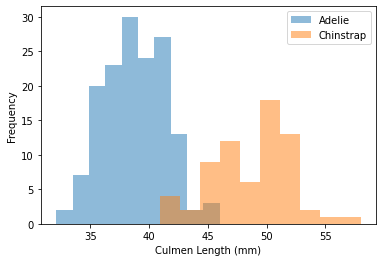

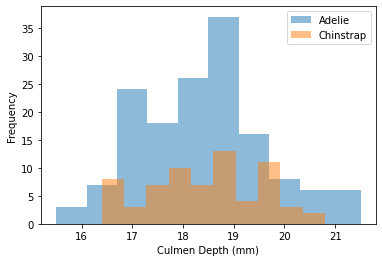

In [55]:
import pandas as pd
import matplotlib.pyplot as plt

penguins = pd.read_csv("../datasets/penguins_classification.csv")

# only keep the Adelie and Chinstrap classes
penguins = penguins.set_index("Species").loc[
    ["Adelie", "Chinstrap"]
].reset_index()

culmen_columns = [
    "Culmen Length (mm)",
    "Culmen Depth (mm)"
]
target_column = "Species"

# We can observe that we have quite a simple problem. 
# When the culmen length increases, the probability that the penguin is a Chinstrap is closer to 1. 
# However, the culmen depth is not helpful for predicting the penguin species.

for feature_name in culmen_columns:
    plt.figure()
    # plot the histogram for each specie
    penguins.groupby("Species")[feature_name].plot.hist(alpha=0.5, legend=True)
    plt.xlabel(feature_name)

In [56]:
# For model fitting, we will separate the target from the data and we will create a training
# and a testing set.

from sklearn.model_selection import train_test_split

penguins_train, penguins_test = train_test_split(
    penguins,
    random_state=0
)

data_train = penguins_train[culmen_columns]
data_test = penguins_test[culmen_columns]

target_train = penguins_train[target_column]
target_test = penguins_test[target_column]

In [57]:
import sklearn
sklearn.set_config(display="diagram")

from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression

logistic_regression = make_pipeline(
    StandardScaler(),
    LogisticRegression(penalty="none")
)

logistic_regression.fit(
    data_train,
    target_train
)

accuracy = logistic_regression.score(
    data_test,
    target_test
)

print(f"Accuracy on test set: {accuracy:.3f}")
logistic_regression

Accuracy on test set: 1.000


Pipeline(steps=[('standardscaler', StandardScaler()),
                ('logisticregression', LogisticRegression(penalty='none'))])

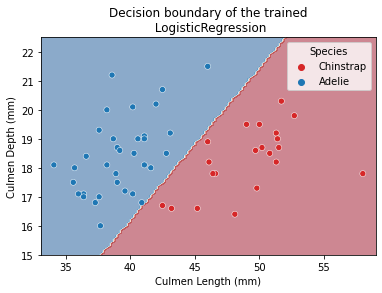

In [58]:
from utils import DecisionBoundaryDisplay
import seaborn as sns

DecisionBoundaryDisplay.from_estimator(
    logistic_regression,
    data_test,
    response_method="predict",
    cmap="RdBu_r",
    alpha=0.5
)

sns.scatterplot(
    data=penguins_test,
    x=culmen_columns[0],
    y=culmen_columns[1],
    hue=target_column,
    palette=["tab:red", "tab:blue"]
)

"""
We see that our decision function is represented by a line separating the 2 classes. 
We should also note that we did not impose any regularization by setting the parameter penalty to 'none'.
"""
_ = plt.title("Decision boundary of the trained\n LogisticRegression")

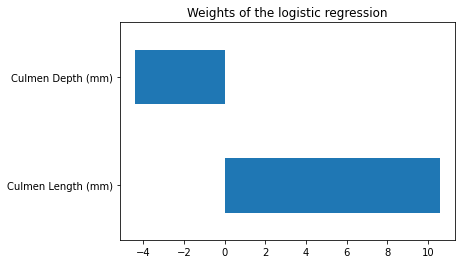

In [59]:
coefs = logistic_regression[-1].coef_[0]  # the coefficients is a 2d array
weights = pd.Series(
    coefs,
    index=culmen_columns
)

weights.plot.barh()
_ = plt.title("Weights of the logistic regression")

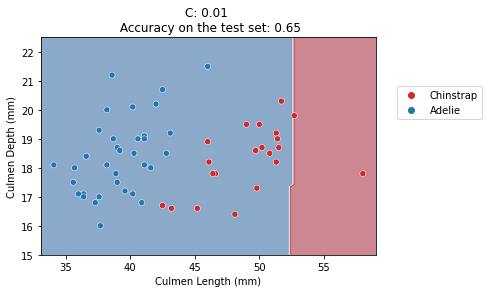

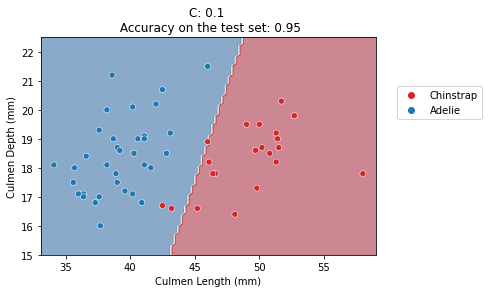

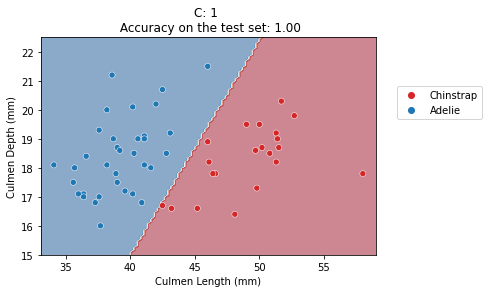

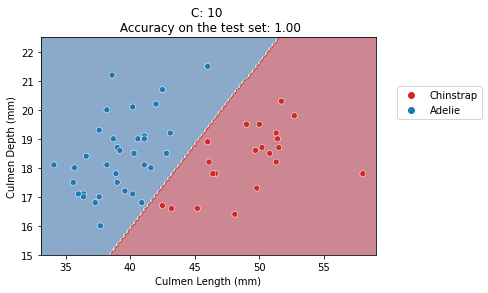

In [60]:
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt
import seaborn as sns
from utils import DecisionBoundaryDisplay

logistic_regression = make_pipeline(
    StandardScaler(),
    LogisticRegression(penalty="l2")
)

Cs = [0.01, 0.1, 1, 10]

for C in Cs:

    logistic_regression.set_params(
        logisticregression__C=C
    )

    logistic_regression.fit(
        data_train,
        target_train
    )
    
    accuracy = logistic_regression.score(
        data_test,
        target_test
    )

    DecisionBoundaryDisplay.from_estimator(
        logistic_regression,
        data_test,
        response_method="predict",
        cmap="RdBu_r",
        alpha=0.5,
    )
    sns.scatterplot(
        data=penguins_test,
        x=culmen_columns[0],
        y=culmen_columns[1],
        hue=target_column,
        palette=["tab:red", "tab:blue"]
    )

    plt.legend(
        bbox_to_anchor=(1.05, 0.8),
        loc="upper left"
    )

    plt.title(f"C: {C} \n Accuracy on the test set: {accuracy:.2f}")

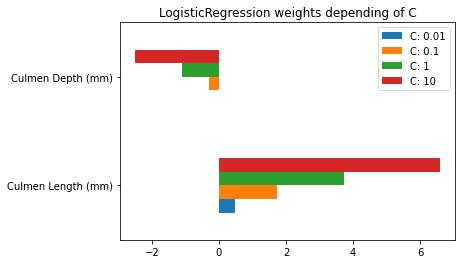

In [61]:
weights_ridge = []
for C in Cs:
    logistic_regression.set_params(logisticregression__C=C)
    logistic_regression.fit(data_train, target_train)
    coefs = logistic_regression[-1].coef_[0]
    weights_ridge.append(pd.Series(coefs, index=culmen_columns))


weights_ridge = pd.concat(
    weights_ridge, axis=1, keys=[f"C: {C}" for C in Cs])
weights_ridge.plot.barh()
_ = plt.title("LogisticRegression weights depending of C")


**Note**


We see that a small `C` will shrink the weights values toward zero. It means that a small `C` provides a more regularized model. 
Thus, `C` is the inverse of the `alpha` coefficient in the `Ridge` model.

Besides, with a strong penalty (i.e. small `C` value), the weight of the feature "Culmen Depth (mm)" is almost zero. 
It explains why the decision separation in the plot is almost perpendicular to the "Culmen Length (mm)" feature.


##### Beyond linear separation in classification

As we saw in the regression section, the linear classification model expects the data to be linearly separable. 

When this assumption does not hold, the model is not expressive enough to properly fit the data.

Therefore, we need to apply the same tricks as in regression: feature augmentation (potentially using expert-knowledge) or using a kernel-based method.

We will provide examples where we will use a kernel support vector machine to perform classification on some toy-datasets where it is impossible to find a perfect linear separation.

We will generate a first dataset where the data are represented as two interlaced half circle. 

This dataset is generated using the function

[`sklearn.datasets.make_moons`](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.make_moons.html).

In [62]:
import numpy as np
import pandas as pd
from sklearn.datasets import make_moons

feature_names = ["Feature #0", "Features #1"]
target_name = "class"

X, y = make_moons(
    n_samples=100,
    noise=0.13,
    random_state=42
)

# We store both the data and target in a dataframe to ease plotting
moons = pd.DataFrame(
    np.concatenate([X, y[:, np.newaxis]], axis=1),
    columns=feature_names + [target_name]
)

data_moons, target_moons = moons[feature_names], moons[target_name]

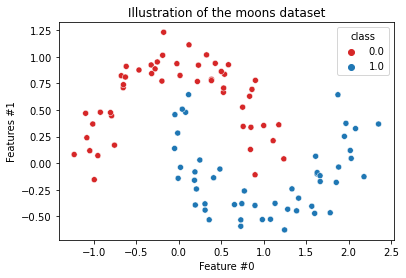

In [63]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.scatterplot(
    data=moons,
    x=feature_names[0],
    y=feature_names[1],
    hue=target_moons,
    palette=["tab:red", "tab:blue"]
)

_ = plt.title("Illustration of the moons dataset")

In [64]:
import sklearn
sklearn.set_config(display="diagram")

from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC

linear_model = make_pipeline(
    StandardScaler(),
    SVC(kernel="linear")
)

linear_model.fit(
    data_moons,
    target_moons
)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('svc', SVC(kernel='linear'))])

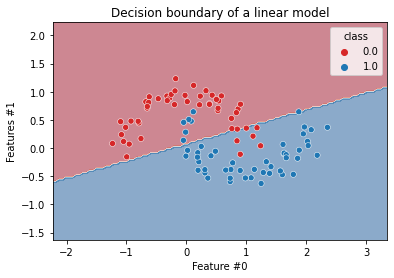

In [65]:
from utils import DecisionBoundaryDisplay

DecisionBoundaryDisplay.from_estimator(
    linear_model,
    data_moons,
    response_method="predict",
    cmap="RdBu",
    alpha=0.5
)

sns.scatterplot(
    data=moons,
    x=feature_names[0],
    y=feature_names[1],
    hue=target_moons,
    palette=["tab:red", "tab:blue"]
)

"""

As expected, a linear decision boundary is not enough flexible to split the two classes.

"""
_ = plt.title("Decision boundary of a linear model")

In [66]:
"""

To push this example to the limit, we will create another dataset where 
samples of a class will be surrounded by samples from the other class.

"""
from sklearn.datasets import make_gaussian_quantiles

feature_names = ["Feature #0", "Features #1"]
target_name = "class"

X, y = make_gaussian_quantiles(
    n_samples=100,
    n_features=2,
    n_classes=2,
    random_state=42
)

gauss = pd.DataFrame(
    np.concatenate([X, y[:, np.newaxis]], axis=1),
    columns=feature_names + [target_name]
)

data_gauss, target_gauss = gauss[feature_names], gauss[target_name]

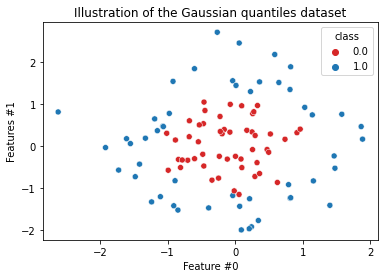

In [67]:
ax = sns.scatterplot(
    data=gauss,
    x=feature_names[0],
    y=feature_names[1],
    hue=target_gauss,
    palette=["tab:red", "tab:blue"]
)

"""

Here, this is even more obvious that a linear decision function is not adapted. 
We can check what decision function, a linear support vector machine will find.

"""

_ = plt.title("Illustration of the Gaussian quantiles dataset")


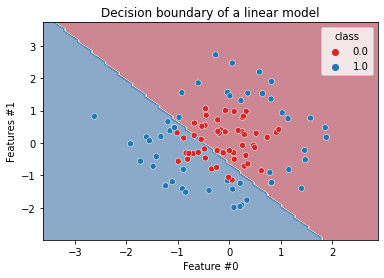

In [68]:
linear_model.fit(
    data_gauss,
    target_gauss
)

DecisionBoundaryDisplay.from_estimator(
    linear_model,
    data_gauss,
    response_method="predict",
    cmap="RdBu",
    alpha=0.5
)

sns.scatterplot(
    data=gauss,
    x=feature_names[0],
    y=feature_names[1],
    hue=target_gauss,
    palette=["tab:red", "tab:blue"]
)

_ = plt.title("Decision boundary of a linear model")

**Note**

As expected, a linear separation cannot be used to separate the classes properly: 

the model will under-fit as it will make errors even on the training set.

Now we will use the later solution by using a radial basis function (RBF) kernel together with a support vector machine classifier.

We will repeat the two previous experiments and check the obtained decision function.



In [69]:


kernel_model = make_pipeline(
    StandardScaler(),
    SVC(kernel="rbf", gamma=5)
)
kernel_model

Pipeline(steps=[('standardscaler', StandardScaler()), ('svc', SVC(gamma=5))])

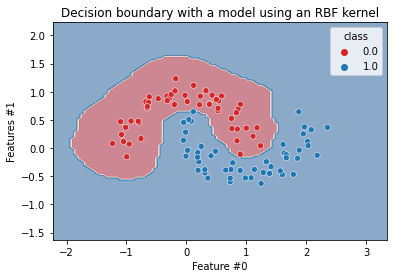

In [70]:
kernel_model.fit(
    data_moons,
    target_moons
)

DecisionBoundaryDisplay.from_estimator(
    kernel_model,
    data_moons,
    response_method="predict",
    cmap="RdBu",
    alpha=0.5
)

sns.scatterplot(
    data=moons,
    x=feature_names[0],
    y=feature_names[1],
    hue=target_moons,
    palette=["tab:red", "tab:blue"]
)

_ = plt.title("Decision boundary with a model using an RBF kernel")

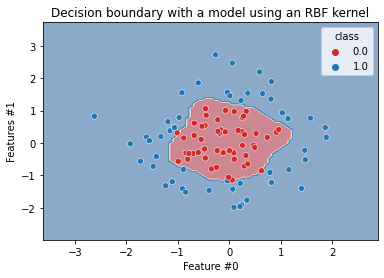

In [71]:
kernel_model.fit(
    data_gauss,
    target_gauss
)

DecisionBoundaryDisplay.from_estimator(
    kernel_model,
    data_gauss,
    response_method="predict",
    cmap="RdBu",
    alpha=0.5
)
ax = sns.scatterplot(
    data=gauss,
    x=feature_names[0],
    y=feature_names[1],
    hue=target_gauss,
    palette=["tab:red", "tab:blue"]
)

"""
kernel trick or feature expansion are the tricks to make a linear classifier more expressive, exactly as we saw in regression.
"""
_ = plt.title("Decision boundary with a model using an RBF kernel")

#### QUIZ 5

**1.By default, a LogisticRegression in scikit-learn applies:**


a) no penalty

b) a penalty that shrinks the magnitude of the weights towards zero (also called "l2 penalty")

c) a penalty that sets some weights exactly to zero (also called "l1 penalty")

<br>

**2.The decision boundaries of a logistic regression:**

a) uses only one of the input features

b) uses a combination of the input features 

c) separates a single class

<br>

**3.The parameter C in a logistic regression is:**

a) similar to the parameter alpha in a ridge regressor

b) similar to 1 / alpha where alpha is the parameter of a ridge regressor

c) not controlling the regularization

<br>



#### Brief summary of nearly *Everything* - 1

<br>

We summarize the Linear models, regularization, variance, bias, etc., with some pictures.

$x$ is one input $\hat{Y}(x)$ is the predicted value from our approximate model, and $Y$ is the True value.

$\Delta$ is the difference between True and predicted value

![true and predicated value](../figures/REG_B_V/REG_B_V_brief_1.png)

<br>

We are looking at one pair of $(x, Y)$ together.

![we look at pairs](../figures/REG_B_V/REG_B_V_brief_2.png)

<br>

$g(x)$ is the True model, but even the True model will not be "Accurate" as we always have some noise $\epsilon$

![even truth is not perfect](../figures/REG_B_V/REG_B_V_brief_3.png)

<br>

we assume that this $\epsilon$ follows the gaussian distribution

![but error can be gaussian](../figures/REG_B_V/REG_B_V_brief_4.png)

<br>

for a given input $x$, our prediction $\hat{Y}(x)$  from the approximate model can either be less than or greater than the True model prediction $g(x)$

![we can be better or worse](../figures/REG_B_V/REG_B_V_brief_5.png)

<br>

These are called *underestimation* and *overestimation*

![over or under](../figures/REG_B_V/REG_B_V_brief_6.png)

<br>

![risk](../figures/REG_B_V/REG_B_V_brief_7.png)

<br>

When using MSE, we relate the risk to variance, bias, and irreducible error. 

![risk, bias, variance and error](../figures/REG_B_V/REG_B_V_brief_8.png)

<br>

[source](https://youtu.be/U2J75Iq2nrk)

[source](https://ds100.org/fa21/lecture/lec18/)

#### Brief summary of nearly *Everything* - 2

<br>

OLS combines the Linear model and MSE as a loss function and can be solved with linear algebra. The goal is to find the optimal $\theta$, i.e., parameter vector, weights of different features.

We can see that initially, both the test and training errors decrease as we move from a random model to a model that captures the contribution of features. But after a point, we will see that though the training error keeps on decreasing, the test error increase as we start to memorize the pattern in the train data.


![OLS](../figures/REG_B_V/REG_B_V_brief_9.png)

<br>

The increase in test error can be attributed to increased complexity by adding the features to explain data points that don't capture the general pattern of the True model but are the noise.

![complexity](../figures/REG_B_V/REG_B_V_brief_10.png)

<br>

So we want to restrict the optimization process not going further than $\theta^{*}$

![restrict theta](../figures/REG_B_V/REG_B_V_brief_11.png)

<br>

One way is to do *Ridge Regularization* or $L^{2}$, which will always find one solution.

![ridge](../figures/REG_B_V/REG_B_V_brief_12.png)

<br>

On the other hand, the *Lasso Regularization* or $L^{1}$ will depend on gradient descent to find the solution.


![lasso](../figures/REG_B_V/REG_B_V_brief_13.png)

<br>

If we add the variance and bias to the plot, we will see that this optimal theta will match the optimal combination of variance and bias tradeoff. 

![optimal point overlaps bias and variance tradeoff](../figures/REG_B_V/REG_B_V_brief_14.png)

<br>

If we look at test error, it decreases until we don't hit the optimal point and increase after it.

![test decrease and then increase](../figures/REG_B_V/REG_B_V_brief_15.png)

<br>

on the other hand, the training error will keep on decreasing

![train decreases](../figures/REG_B_V/REG_B_V_brief_16.png)

<br>

![dart board](../figures/REG_B_V/REG_B_V_brief_17.png)

<br>

![summary](../figures/REG_B_V/REG_B_V_brief_18.png)

<br>

[source](https://youtu.be/U2J75Iq2nrk)

[source](https://ds100.org/fa21/lecture/lec18/)

